
**Название:** Аналитик развлекательного приложения Procrastinate Pro+.

**Краткое описание:** Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цели и задачи:** Разобраться в причинах и помочь компании выйти в плюс.

**Описание исходных данных:**

    - Visits: лог сервера с данными об их посещениях
    - Orders: выгрузка их покупок за этот период
    - Costs:рекламные расходы
    
**План (декомпозиция) анализа данных:**

    - Шаг 1. Загржаем данные и подготовливаем их к анализу
    - Шаг 2. Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии
    - Шаг 3. Проведём исследовательский анализ данных:
      - Определите минимальную и максимальную даты привлечения пользователей.
      - Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
      - Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
      - Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
    - Шаг 4. Маркетинг:
      - Выясним сколько денег потратили (Всего / на каждый источник / по времени)? 
      - Выясним сколько в среднем стоило привлечение одного покупателя из каждого источника?
    - Шаг 5. Оценм окупаемость рекламы для привлечения пользователей:
      - Напишем функции для расчета.
      - Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
      - Проанализируйте окупаемость рекламы с разбивкой по устройствам.
      - Проанализируйте окупаемость рекламы с разбивкой по странам.
      - Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.
    - Шаг 6. Общий вывод и рекомендации для отдела маркетинга.


## Шаг 1. Загржаем данные и подготовливаем их к анализу

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs =  pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
display(visits.head())
visits.info()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits = visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
}
                  )

In [5]:
visits.columns.tolist()

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'],   format = '%Y-%m-%d %H:%M:%S')
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [7]:
visits.duplicated().sum()

0

In [8]:
display(orders.head())
orders.info()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders = orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue',
   }
                  )

In [10]:
orders.columns.tolist()

['user_id', 'event_dt', 'revenue']

In [11]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = '%Y-%m-%d %H:%M:%S')
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [12]:
orders.duplicated().sum()

0

In [13]:
display(costs.head())
costs.info()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs = costs.rename(columns={'Channel':'channel'})

In [15]:
costs.columns.tolist()

['dt', 'channel', 'costs']

In [16]:
pd.to_datetime(costs['dt']).dt.date
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [17]:
costs.duplicated().sum()

0

### **Вывод**
<br> 1) Импортировали и просмотрели таблицы.
<br> 2) Провели проверку на пропущенные данные, дубликаты, и привели названия столбцов к стандартам.
<br> 3) Преобразовали данные о времени для дальнейших расчётов.



## Шаг 2. Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии

In [18]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
#проверка функции
# получаем профили пользователей
#profiles = get_profiles(visits, orders, costs)
#print(profiles.head(5)) 

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### **Вывод** 
<br>Собрали функции для создания профилей, расчёта удержания, конверсии, LTV и ROI из пройденного спринта: get_profiles(), get_retention(), get_conversion() и get_ltv().

## Шаг 3. Проведём исследовательский анализ данных



In [24]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [25]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

### Создаем пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей.

In [26]:
profiles.agg({'dt': ['min', 'max']})

dt
min  2019-05-01
max  2019-10-27

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [27]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by=['payer'])

user_id     payer
region                          
France           17450  0.037994
UK               17575  0.039829
Germany          14981  0.041119
United States   100002  0.069019

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [28]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer':'mean'}).sort_values(by=['payer'])

user_id     payer
device                    
PC         30455  0.050468
Android    35032  0.058518
iPhone     54479  0.062079
Mac        30042  0.063644

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':'mean'}).sort_values(by=['payer'])

user_id     payer
channel                              
organic               56439  0.020553
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
TipTop                19561  0.096007
lambdaMediaAds         2149  0.104700
AdNonSense             3880  0.113402
FaceBoom              29144  0.122049

### Вывод
<br> 1) Получили профили пользователей. Для этого вызовали функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.
<br> 2) Определили минимальную и максимальную даты привлечения пользователей, из первых 5ти записей, делаю вывод, что данные пользователи, были в приложении единождый (одинь день).
<br> 3) Выявили страны, из которых пользователи  заходят в приложение, на США приходится больше всего платящих пользователей.
<br> 4) Основными устройствами, которыми пользуются пользователи - это PC, Android, Iphone, Mac. Больше всего платящих пользователей с устройством Iphone.
<br> 5) Больше всего платящих пользователей пришло с канала "FaceBoom", в тройке лидеров TipTop и OppleCreativeMedia.
<br>

## Шаг 4. Маркетинг

In [30]:
profiles = profiles.query('channel != "organic"') #отфильтруем орагнических пользщователй из источника исследования

In [31]:
profiles.agg({'acquisition_cost': 'sum'}) #общая сумма расходов

acquisition_cost    105497.3
dtype: float64

In [32]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by=['acquisition_cost'])#сумма трат по каналам

acquisition_cost
channel                             
YRabbit                       944.22
MediaTornado                  954.48
lambdaMediaAds               1557.60
LeapBob                      1797.60
RocketSuperAds               1833.00
OppleCreativeMedia           2151.25
AdNonSense                   3911.25
WahooNetBanner               5151.00
FaceBoom                    32445.60
TipTop                      54751.30

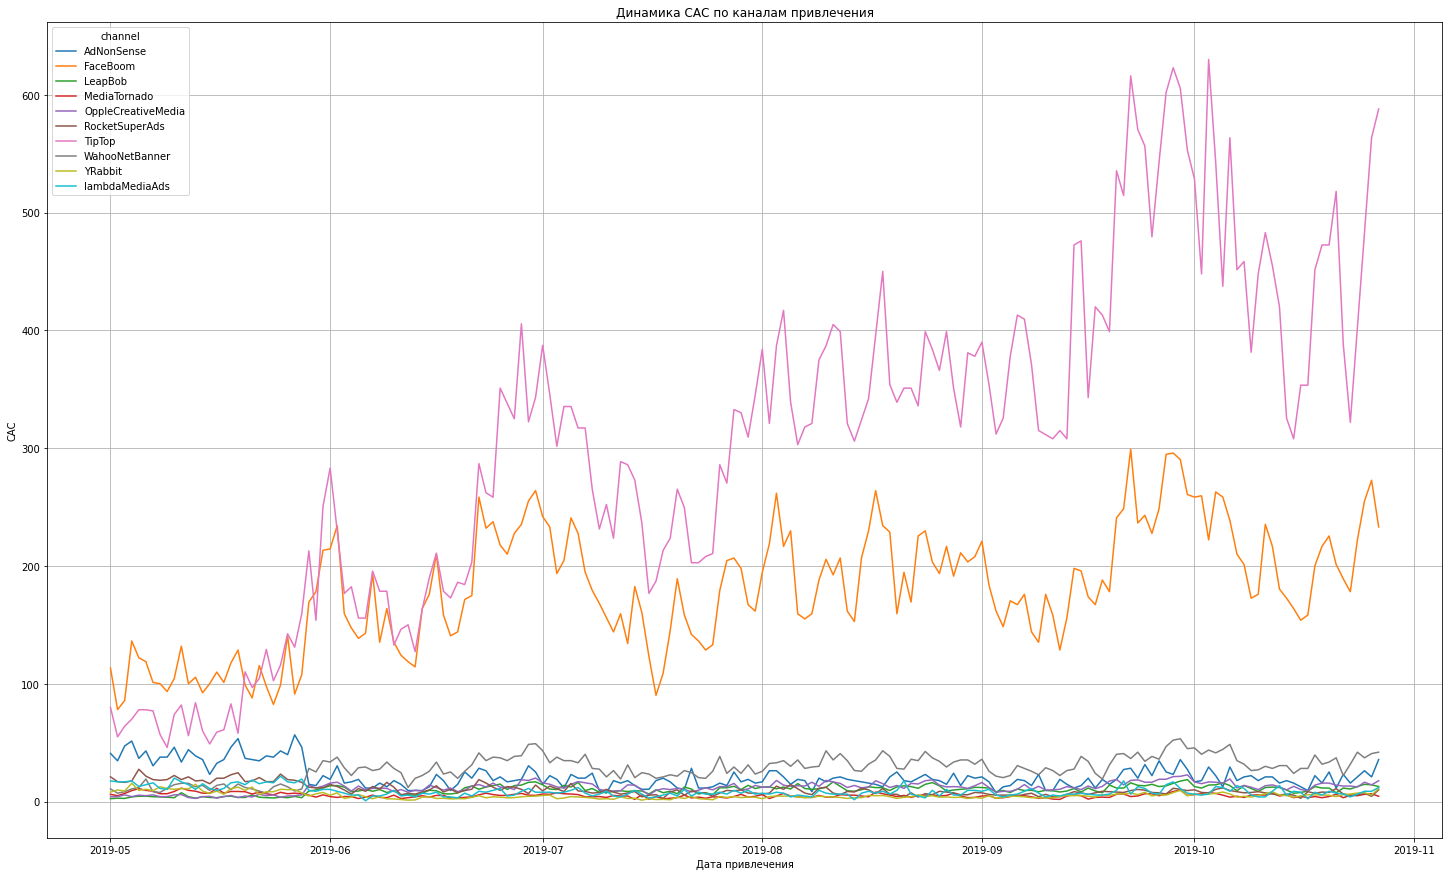

In [33]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, figsize=(25,15))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [34]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by=['acquisition_cost']) #CAC в среднем по источникам


acquisition_cost
channel                             
LeapBob                     0.210172
MediaTornado                0.218717
YRabbit                     0.218975
OppleCreativeMedia          0.250000
RocketSuperAds              0.412095
WahooNetBanner              0.602245
lambdaMediaAds              0.724802
AdNonSense                  1.008054
FaceBoom                    1.113286
TipTop                      2.799003

In [35]:
profiles.agg({'acquisition_cost': 'mean'})#общий CAC в среднем


acquisition_cost    1.127481
dtype: float64

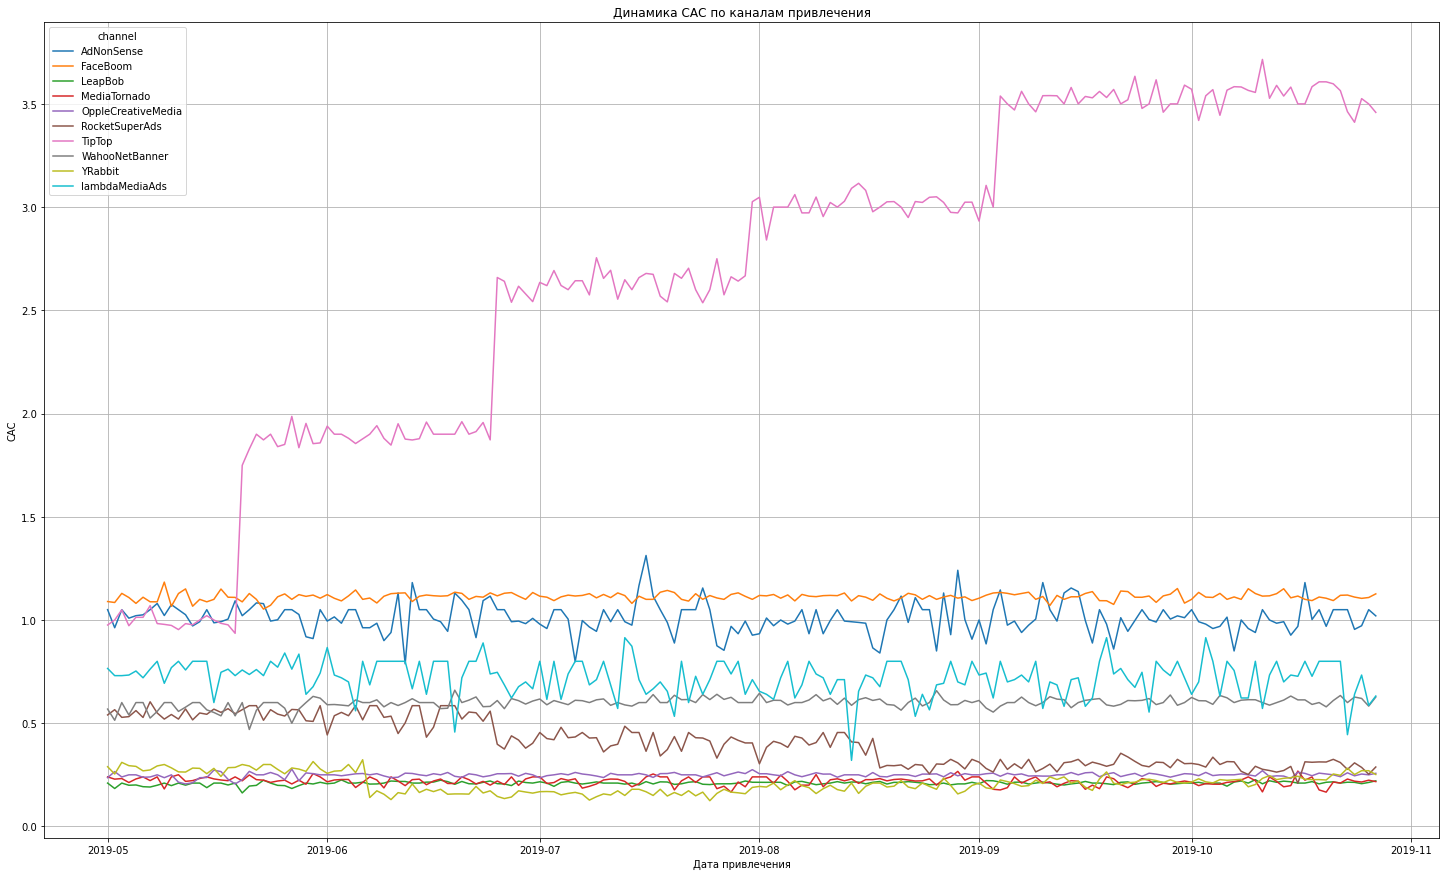

In [36]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(25,15))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [37]:
# рассчитываем LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

roi  # таблица ROI

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
AdNonSense                 3702  1.008023  0.501010  0.584460  0.639288   
FaceBoom                  27544  1.113419  0.526040  0.593510  0.629343   
LeapBob                    8103  0.210000  0.509752  0.741436  0.978967   
MediaTornado               4167  0.219035  0.627684  0.874814  1.127410   
OppleCreativeMedia         8139  0.249908  0.389100  0.526504  0.686996   
RocketSuperAds             4251  0.417431  0.497256  0.763336  0.948932   
TipTop                    18498  2.757774  0.124575  0.180359  0.226321   
WahooNetBanner             8082  0.601856  0.317853  0.484298  0.629588   
YRabbit                    4102  0.217087  0.752238  0.983122  1.179250   
lambdaMediaAds             2056  0.727237  0.632899  0.887333  1.070887   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
AdNonSense          0.678069  0.701069  0.726752  0.748147  0.761519   
FaceBoom            0.654599  0.671035  0.682914  0.695801  0.704818   
LeapBob             1.120908  1.236450  1.374282  1.498034  1.589535   
MediaTornado        1.340729  1.516873  1.675432  1.773841  1.910531   
OppleCreativeMedia  0.826849  0.964769  1.065354  1.161037  1.238564   
RocketSuperAds      1.092347  1.235204  1.367935  1.531090  1.646391   
TipTop              0.268272  0.305449  0.339298  0.367570  0.397585   
WahooNetBanner      0.737309  0.858780  0.946188  1.049868  1.126808   
YRabbit             1.400049  1.641119  1.786814  1.910094  2.022179   
lambdaMediaAds      1.245178  1.432136  1.595673  1.735841  1.859323   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
AdNonSense          0.782922  0.796294  0.800573  0.808597  0.820631  0.831337  
FaceBoom            0.711685  0.719204  0.724119  0.729488  0.734210  0.737790  
LeapBob             1.759730  1.877030  1.988470  2.085248  2.179087  2.252399  
MediaTornado        2.008962  2.107371  2.216726  2.320602  2.402610  2.436519  
OppleCreativeMedia  1.314661  1.388265  1.457448  1.507006  1.580649  1.637075  
RocketSuperAds      1.767923  1.892809  1.991795  2.070538  2.152657  2.237019  
TipTop              0.424763  0.451627  0.475535  0.497310  0.517679  0.539532  
WahooNetBanner      1.205193  1.271878  1.350049  1.411192  1.477881  1.526304  
YRabbit             2.123045  2.212703  2.313569  2.414457  2.516446  2.578086  
lambdaMediaAds      1.986818  2.070251  2.171709  2.241794  2.331922  2.428712

In [38]:
ltv #таблица LTV

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.505030  0.589149  0.644417  0.683509   
FaceBoom                  27544  0.585703  0.660825  0.700722  0.728842   
LeapBob                    8103  0.107048  0.155702  0.205583  0.235391   
MediaTornado               4167  0.137485  0.191615  0.246943  0.293667   
OppleCreativeMedia         8139  0.097239  0.131578  0.171686  0.206636   
RocketSuperAds             4251  0.207570  0.318640  0.396114  0.455980   
TipTop                    18498  0.343550  0.497389  0.624141  0.739834   
WahooNetBanner             8082  0.191302  0.291477  0.378921  0.443754   
YRabbit                    4102  0.163301  0.213423  0.256000  0.303932   
lambdaMediaAds             2056  0.460268  0.645302  0.778789  0.905540   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.706694  0.732582  0.754149  0.767628  0.789203   
FaceBoom            0.747143  0.760369  0.774718  0.784757  0.792404   
LeapBob             0.259654  0.288599  0.314587  0.333802  0.369543   
MediaTornado        0.332249  0.366979  0.388534  0.418474  0.440034   
OppleCreativeMedia  0.241103  0.266240  0.290152  0.309527  0.328544   
RocketSuperAds      0.515613  0.571019  0.639125  0.687255  0.737986   
TipTop              0.842358  0.935707  1.013676  1.096450  1.171400   
WahooNetBanner      0.516862  0.569469  0.631870  0.678176  0.725353   
YRabbit             0.356265  0.387894  0.414656  0.438988  0.460885   
lambdaMediaAds      1.041503  1.160433  1.262369  1.352169  1.444888   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.802682  0.806996  0.815084  0.827215  0.838006  
FaceBoom            0.800775  0.806247  0.812226  0.817483  0.821469  
LeapBob             0.394176  0.417579  0.437902  0.457608  0.473004  
MediaTornado        0.461589  0.485541  0.508294  0.526256  0.533684  
OppleCreativeMedia  0.346938  0.364228  0.376613  0.395017  0.409118  
RocketSuperAds      0.790118  0.831437  0.864307  0.898586  0.933801  
TipTop              1.245485  1.311417  1.371467  1.427640  1.487908  
WahooNetBanner      0.765488  0.812535  0.849334  0.889472  0.918615  
YRabbit             0.480349  0.502245  0.524147  0.546287  0.559668  
lambdaMediaAds      1.505564  1.579348  1.630316  1.695861  1.766250

### Вывод
<br>1) Выявили, что всего на рекламу было затрачено 105497.3 у.е.(условных единиц), преположу что это в USD.
<br>2) Вычислили, что больше всего на рекламы затратили TipTop (54751,30 USD), FaceBoom (32445,60 USD), WahooNetBanner (5151 USD),у остальных до 4000 USD.
<br>3) А так же высчитали CAC в среднем по источникам. Для TipTop (2,79 USD), FaceBoom (1,11 USD), AdNonSense (1 USD), для остальных меньше 1 USD.


## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей


### Функции для расчета


In [39]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [40]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = '13'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Динамика удержания платящих пользователей на 14-й день')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Динамика удержания неплатящих пользователей на 14-й день')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Удержание платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Удержание неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [41]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей на 14-й день')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [42]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [43]:
#profiles = get_profiles(visits, orders, costs)
#print(profiles.head(5)) 

### Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

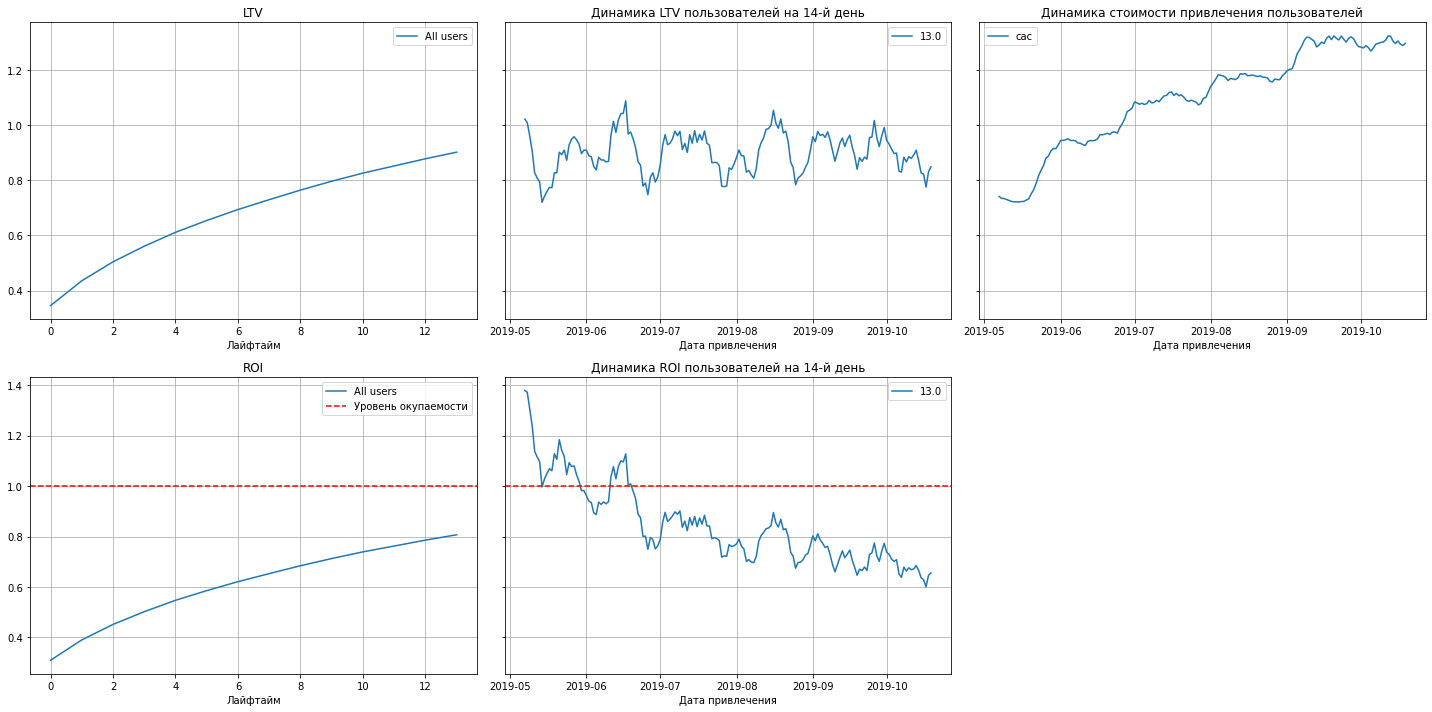

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Вывод
<br> 1) ROI в конце недели доходит до 80%.
<br> 2) В начале недели у CAC был стремительный рост, к концу недели САС стал расти плавно.
<br> 3) LTV плавно растет от нуля с возможным пересечением единицы. Значит, дело не в ухудшении качества пользователей.
<br> 4) Общий вовыод - Реклама не окупается. 


### Проанализируйте окупаемость рекламы с разбивкой по устройствам

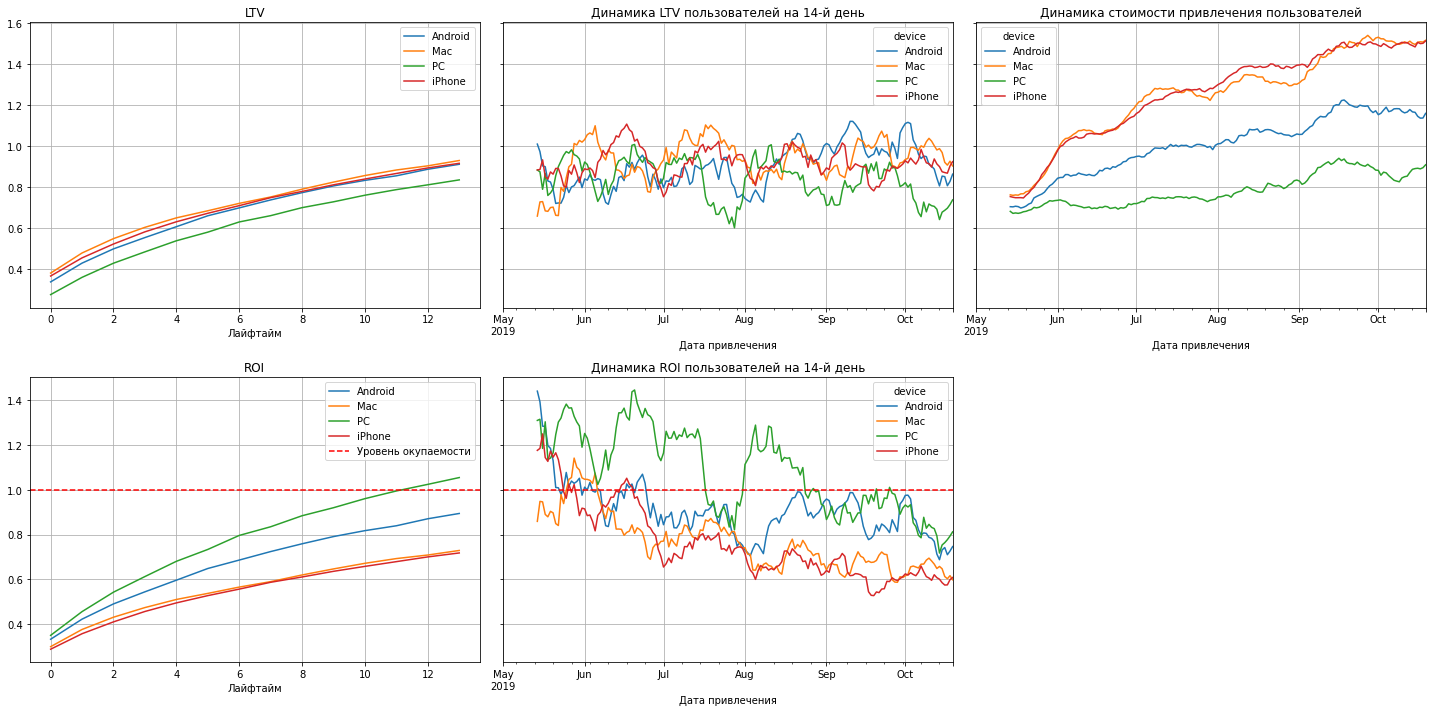

In [45]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод

<br> 1) Хорошо конвертируются пользоватеои PC, а вот пользователи Anfroid, Iphone и Mac плохо конвертируются.
<br> 2) LTV все также стабильно растет вверх.
<br> 3) На PC средств на привлечение пользователей тратят меньше всего, при этом динамика ROI показывает хороший результат.
<br> 4)Динамика LTV практически стабильна для всех пользователей.


### Проанализируйте окупаемость рекламы с разбивкой по странам

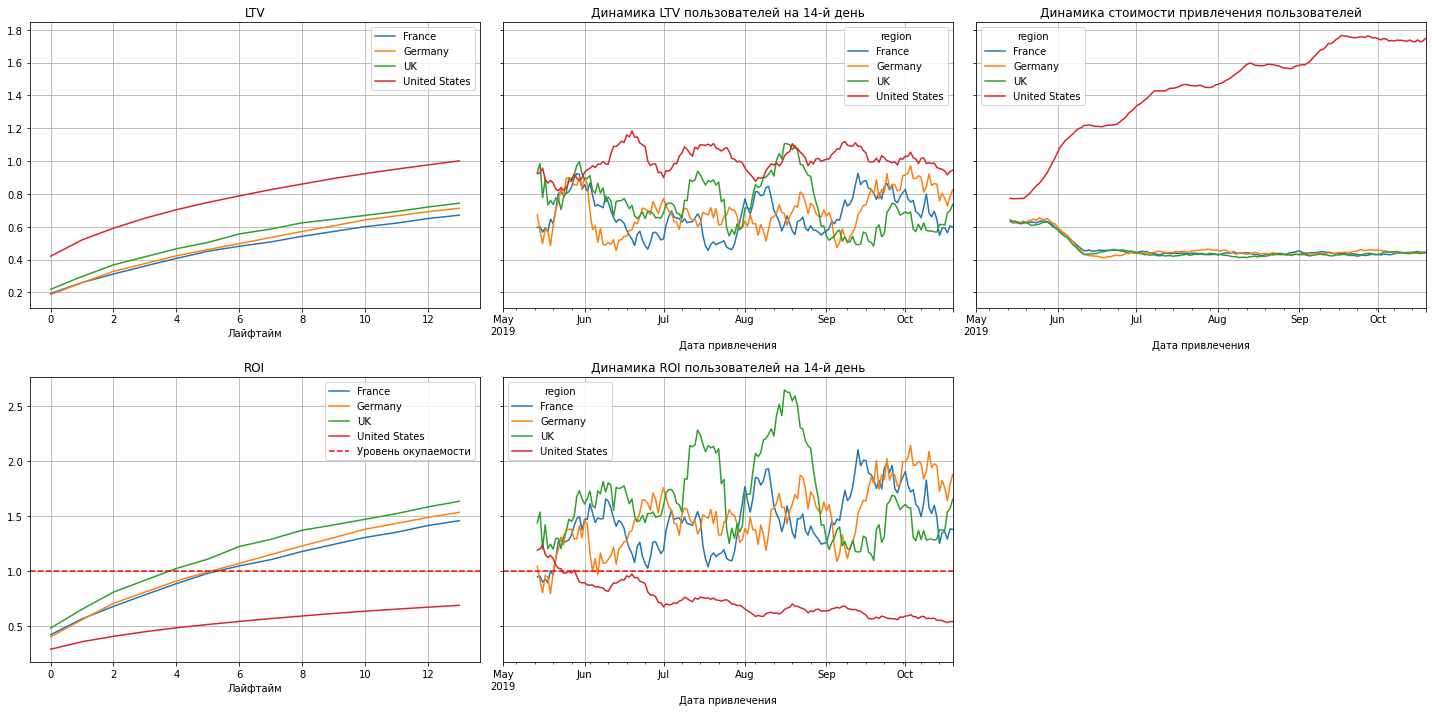

In [46]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод 
<br>1) В штатах на привлечение пользователей тратять в 4-5 раз больше, чем в других странах, но к сожалению не окупается.
<br>2) LTV стабилен.
<br>3) Лучше всего окупается UK, далее GDR и France практически одинаковы.
<br>4) Динамика LTV выше в штатах, чуть хуже во France, UK, GDR.


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

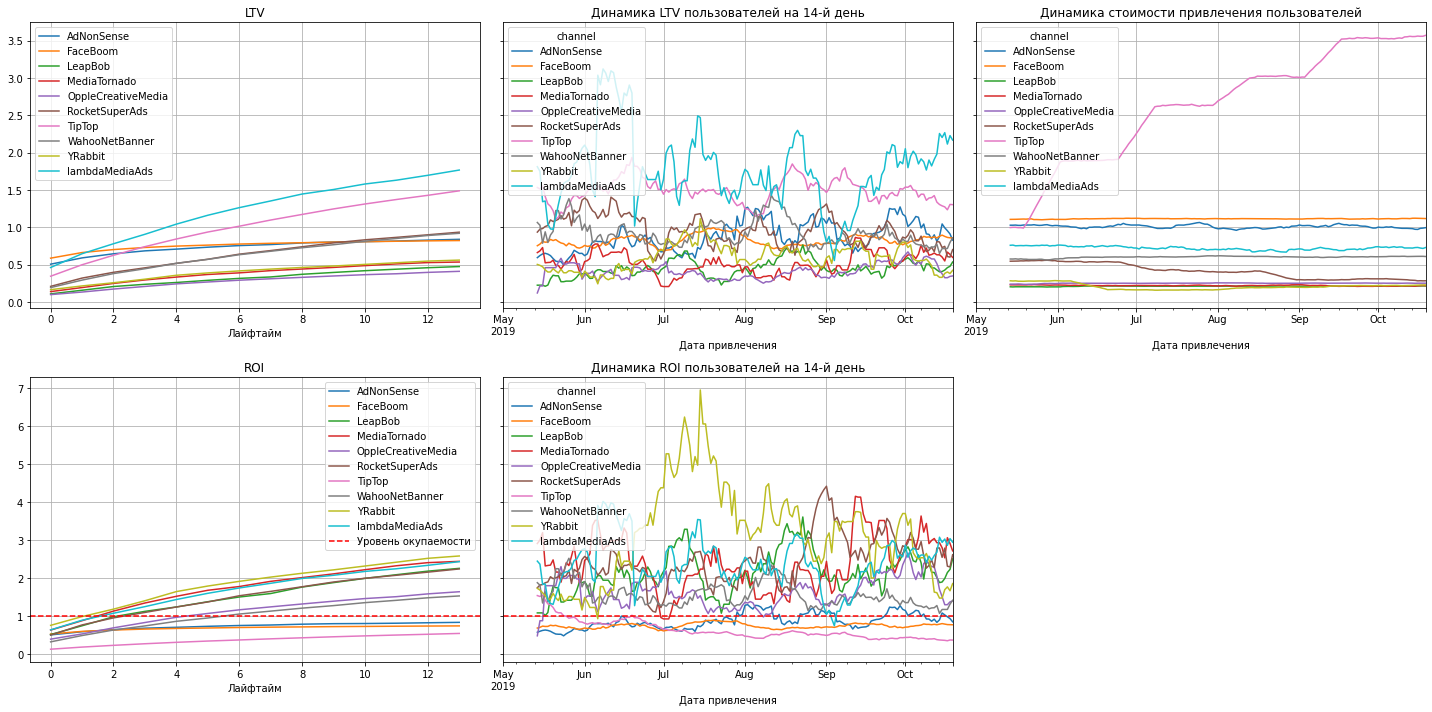

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод
<br> 1) LTV плавно растет
<br> 2) На TipTop затрачивается больше средств, чем другие источники.
<br> 3) Хорошая динамика ROI у источника YRabbit, затрат немного, но привлекают достаточное кол-во.
<br> 4) Динамика LTV LambdaMediaAds и TipTop на уровень выше других.

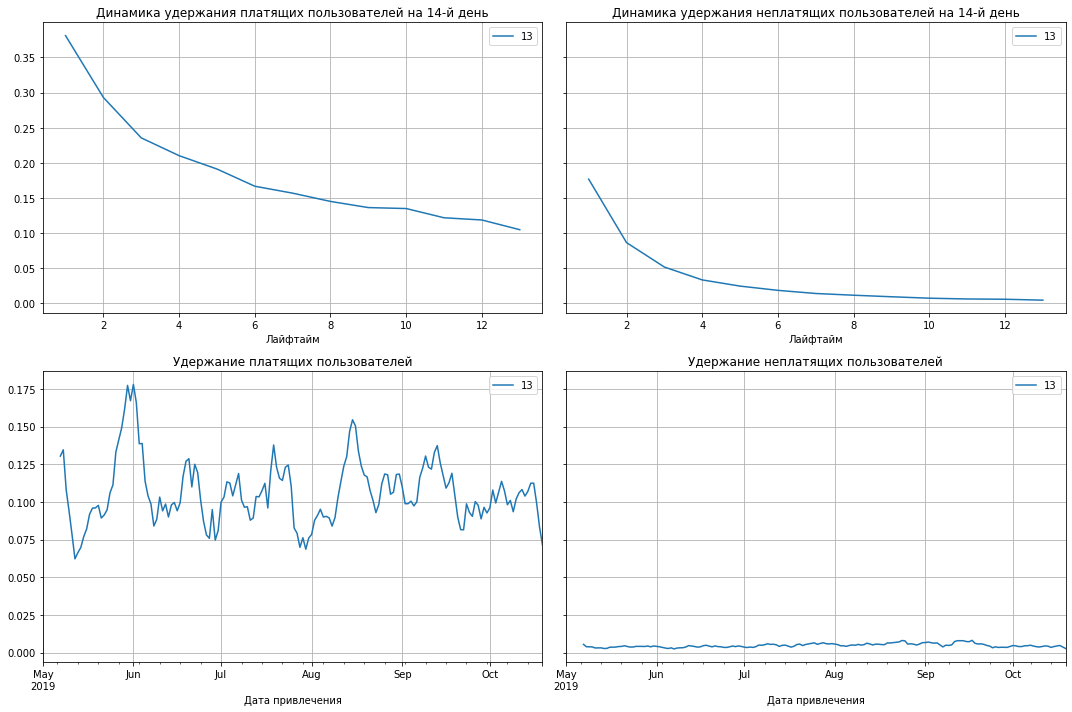

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

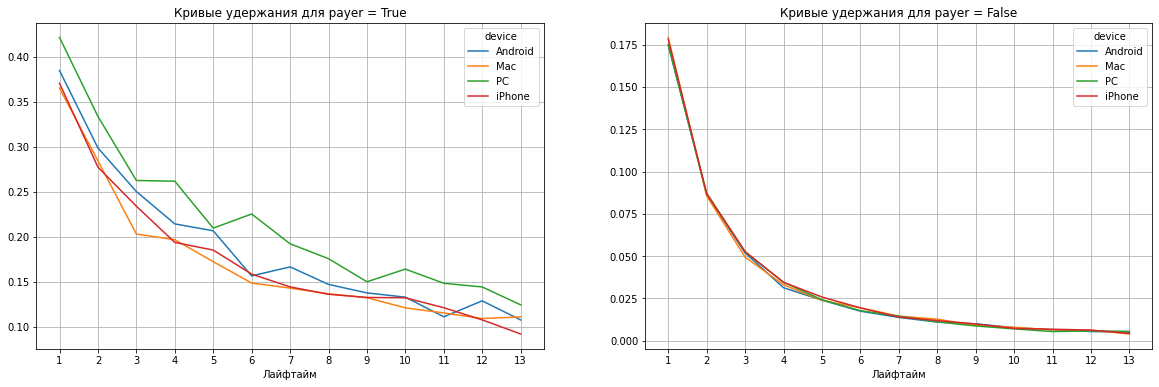

In [49]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# --- строим кривые удержания ---

plt.figure(figsize=(20, 6))

# берём таблицу удержания retention
# исключаем размеры когорт и удержание первого дня
report = retention.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1),
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

#### Вывод 
Графики удержаний меняются по всем каналам примерно одинаково, самые качественные показатели платящих клиентов это на PC хуже у MAC, Iphone. У не платящих все стабильно.
Графики удержания по каналам источников привлечения пользователей для платящих клиентов хуже всего у FAceBoom,AdNonSense. Хорошие показатели у WahooNetBannerLambdaMediaAds. Графики не платящих клиентов выглядят стабильнее, чем удержание платящих.

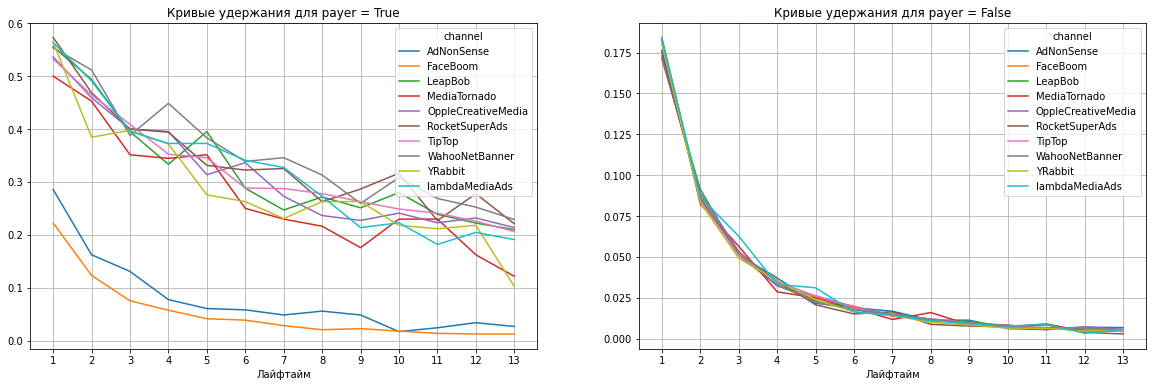

In [50]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)


# --- строим кривые удержания ---

plt.figure(figsize=(20, 6))

# берём таблицу удержания retention
# исключаем размеры когорт и удержание первого дня
report = retention.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1),
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

#### Вывод
Графики удержания по каналам источников привлечения пользователей для платящих клиентов хуже всего у FAceBoom,AdNonSense. Хорошие показатели у WahooNetBanner, LambdaMediaAds. Графики не платящих клиентов выглядят стабильнее, чем удержание платящих.

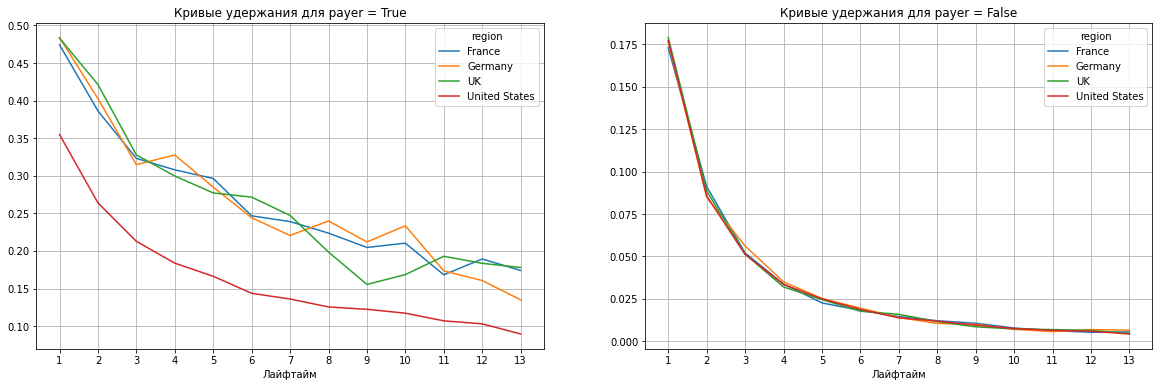

In [51]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)


# --- строим кривые удержания ---

plt.figure(figsize=(20, 6))

# берём таблицу удержания retention
# исключаем размеры когорт и удержание первого дня
report = retention.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1),
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

#### Вывод 
Графики удержания по регионам для платящих клиентов хуже всего у США, в остальных странах все более менее одинаково, но чуть лучше у UK. 
По не платящим клиентам все одинаково.

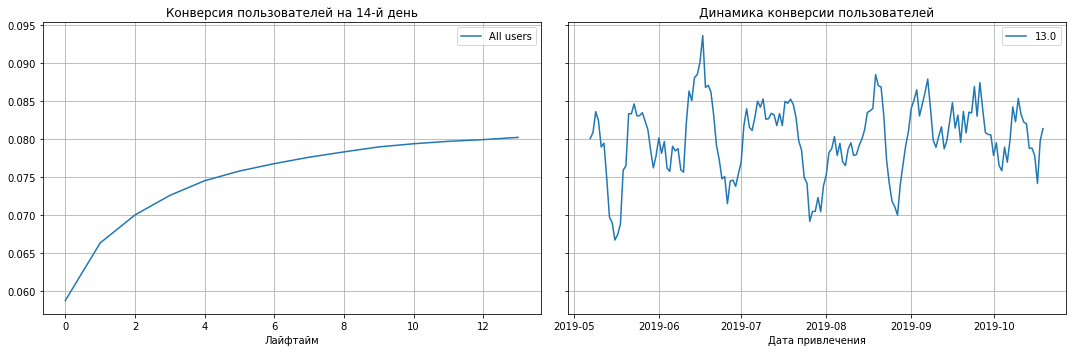

In [52]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

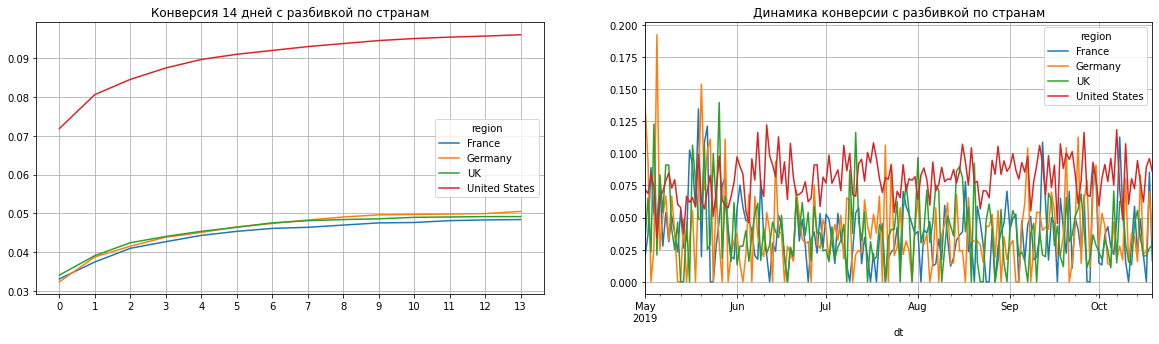

In [53]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия 14 дней с разбивкой по странам')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='region', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии с разбивкой по странам')

plt.show() 

#### Вывод 
США не всегда конвертировался лучше UK и GDR, новые пользователи из GDR и UK с мая по июнь показывали более высокую конверсию. В остальные жни лучший показатель у США, у France на более низком уровне.

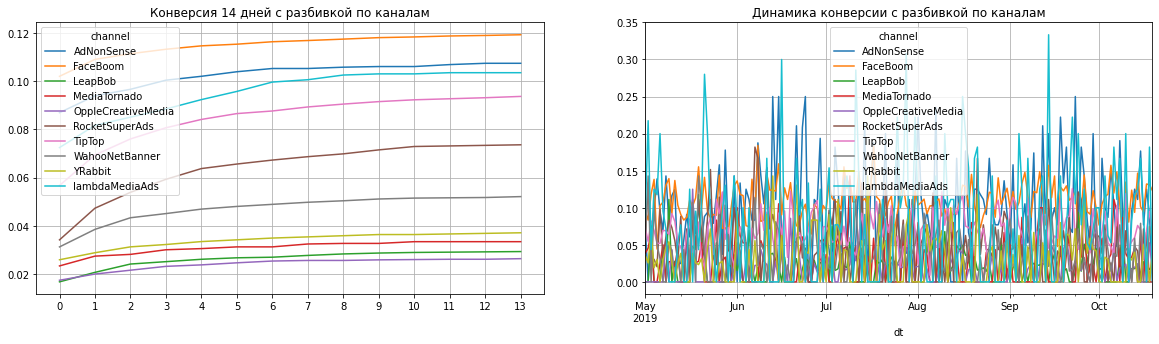

In [54]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия 14 дней с разбивкой по каналам')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='channel', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии с разбивкой по каналам')

plt.show() 

#### Вывод
Хорошо конвертируется FaceBoom, AdNonSense, LambdaMediaAds, хуже WahooNetBanner, LeapBob. Если рассмотреть конверсию за весь период, лидирует LambdaMediaAds, AdNonSense.

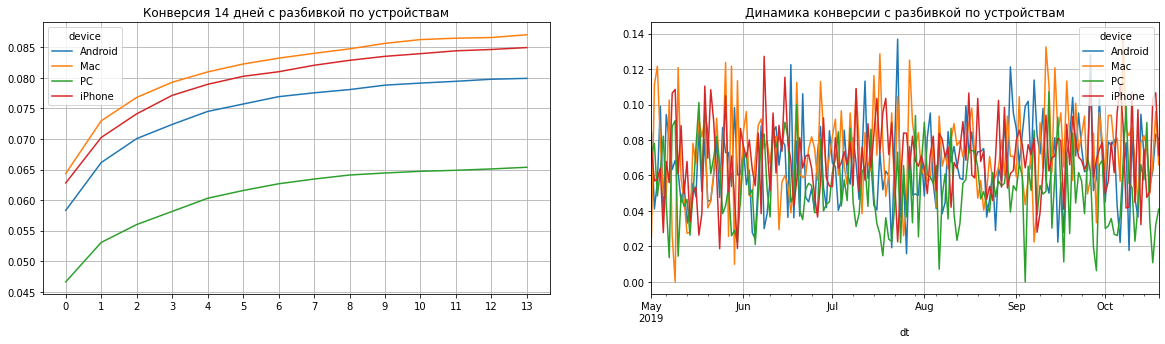

In [55]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия 14 дней с разбивкой по устройствам')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='device', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии с разбивкой по устройствам')

plt.show() 

#### Вывод
Хорошо конвертируются пользователи Mac, Iphone, хуже PC. Если рассмотреть весь период, то ничего не поменяется по сравнению на 14 день.

## Шаг 6. Общий вывод
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

<br>Реклама, направленная на привлечение пользователей в целом не окупается.
В исселодвании выявили, что пользователей с утройством Iphone'а в 1,5 больше Android'а, CAC у пользователей Iphone в несколько раз больше по сравнению с остальными, но при этом ROI к сожалению очень низкий. Возможна какая-то техническая причина.
<br>Рекомендую отделу маркетинга обратиться к разработчикам и проверить файлы на наличие ошибок у пользователей IOS, с целью их выявления и устранения.
        <br>- на рекламу в США для привлечения пользователей тратят большие суммы, но это не окупается. Динамика LTV слабовато.
        <br>- источник привлечения пользователей TipTop не окупается, затраты на него в 4-5 раз выше остальных. Динамика ROI очень низкая.
        <br>- у источника привлечения пользователей FaceBoom плохие показатели динамики LTV и ROI.
        <br>- у источника привлечения пользователей YRabbitочень хорошие показали динамики LTV, ROI и CAC.
        <br>- у пользователей PC отличные показатели по всем параметрам.
    
<br> Маркетологам, чтобы решить вопрос с окупаемостью в США следует обратить внимание на источник привлечения пользователей YRabbit, он в 5 раз обойдется дешевле, при этом привлечет в несколько раз больше пользователей. Возможно стоит рассмотреть устройства, в которых пользователи проводят больше времени и на них нацелить дополнительные ресурсы. 
        <br> В Европе не так хорошо обстоят дела с пользователями устройств на Iphone, Mac, есть вероятность какого-то бага или же функционально он не так хорош, как на PC. Стоит обратиться к разработчикам и проверить это. Так же стоит рассмотреть менее бюджетные источники привлечения пользователей, это поможет заработать дополнительные средства.
        <br> США не всегда конвертировался лучше UK и GDR, новые пользователи из GDR и UK с мая по июнь показывали более высокую конверсию. В остальные дни лучший показатель у США, у France на более низком уровне.
    <br> Графики удержаний меняются по всем каналам примерно одинаково, самые качественные показатели платящих клиентов это на PC, хуже у MAC, Iphone. У не платящих все стабильно. Графики удержания по каналам источников привлечения пользователей для платящих клиентов хуже всего у FAceBoom,AdNonSense. Хорошие показатели у WahooNetBanner, LambdaMediaAds. Графики не платящих клиентов выглядят стабильнее, чем удержание платящих.
    <br> Графики удержания по регионам для платящих клиентов хуже всего у США, в остальных странах все более менее одинаково, но чуть лучше у UK. По не платящим клиентам все одинаково.
    <br> Хорошо конвертируется FaceBoom, AdNonSense, LambdaMediaAds, хуже WahooNetBanner, LeapBob. Если рассмотреть конверсию за весь период, лидирует LambdaMediaAds, AdNonSense.
    <br> на 14 день хорошо конвертируются пользователи Mac, Iphone, хуже PC. Если рассмотреть весь период, то ничего не поменяется по сравнению на 14 день.
    <br> Маркетологам дам рекомендации рассмотреть источник привлечения пользователей WahooNetBanner(но нужно быть осторожным, так как конверсия на больший период времени у него не так хороша), в приоритете LambdaMediaAds и AdNonSense, так как у них хорошие показатели, минимально вкладывать в FaceBoom(хотя конверсия хорошая), так как он себя не окупает совсем.